# Legacy

In [ ]:
from lattice_hamiltonians import *

In [5]:
from scipy.sparse import csr_matrix
np.set_printoptions(precision=6, suppress=True)

err_norm = 'spectral' # HS, spectral
n_qubit = 6; epsilon = 0.001
t = 2 * n_qubit 
heisenberg = heisenberg_1d(n=n_qubit, Jx=2.0, Jy=2.0, Jz=2.0, h=0.5, verbose=True)
heisenberg.partition(method='parity', verbose=True)
heisenberg.partition(method='tri', verbose=True)
parity_group_sparse = [csr_matrix(heisenberg.even), csr_matrix(heisenberg.odd)]
parity_group = [heisenberg.even.to_matrix(), heisenberg.odd.to_matrix()]

r_mat = parity_group[0] @ parity_group[1] - parity_group[1] @ parity_group[0]
eigenvals, eigenvecs = np.linalg.eigh(parity_group[0] + parity_group[1])
print(np.array(sorted(eigenvals)))
r_mat_trans = np.linalg.inv(eigenvecs) @ r_mat @ eigenvecs
print(np.array(r_mat_trans))

---------Heisenberg Hamiltonian---------
inter_xx: ['XXIIII', 'IXXIII', 'IIXXII', 'IIIXXI', 'IIIIXX', 'XIIIIX']
inter_yy: ['YYIIII', 'IYYIII', 'IIYYII', 'IIIYYI', 'IIIIYY', 'YIIIIY']
inter_zz: ['ZZIIII', 'IZZIII', 'IIZZII', 'IIIZZI', 'IIIIZZ', 'ZIIIIZ']
external ['ZIIIII', 'IZIIII', 'IIZIII', 'IIIZII', 'IIIIZI', 'IIIIIZ']
---------Partitioned Hamiltonian---------
inter_xx_even: ['XXIIII', 'IIXXII', 'IIIIXX']
inter_xx_odd: ['IXXIII', 'IIIXXI', 'XIIIIX']
external_even ['ZIIIII', 'IIZIII', 'IIIIZI']
external_odd ['IZIIII', 'IIIZII', 'IIIIIZ']
[-22.422205 -17.944272 -16.944272 -15.944272 -12.       -11.246211
 -11.246211 -10.246211 -10.246211  -9.246211  -9.246211  -9.
  -9.        -8.        -8.        -7.        -7.        -6.
  -5.        -4.        -4.        -4.        -3.        -2.
  -2.        -2.        -1.        -1.        -0.055728   0.
   0.         0.944272   1.         1.         1.944272   2.
   2.         3.         4.         5.         5.246211   5.246211
   6.         6

## Heisenberg (XYZ, Parity)

---------Heisenberg Hamiltonian---------
inter_xx: ['XXIIIIII', 'IXXIIIII', 'IIXXIIII', 'IIIXXIII', 'IIIIXXII', 'IIIIIXXI', 'IIIIIIXX', 'XIIIIIIX']
inter_yy: ['YYIIIIII', 'IYYIIIII', 'IIYYIIII', 'IIIYYIII', 'IIIIYYII', 'IIIIIYYI', 'IIIIIIYY', 'YIIIIIIY']
inter_zz: ['ZZIIIIII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIZZII', 'IIIIIZZI', 'IIIIIIZZ', 'ZIIIIIIZ']
external ['ZIIIIIII', 'IZIIIIII', 'IIZIIIII', 'IIIZIIII', 'IIIIZIII', 'IIIIIZII', 'IIIIIIZI', 'IIIIIIIZ']
---------Partitioned Hamiltonian---------
inter_xx_even: ['XXIIIIII', 'IIXXIIII', 'IIIIXXII', 'IIIIIIXX']
inter_xx_odd: ['IXXIIIII', 'IIIXXIII', 'IIIIIXXI', 'XIIIIIIX']
external_even ['ZIIIIIII', 'IIZIIIII', 'IIIIZIII', 'IIIIIIZI']
external_odd ['IZIIIIII', 'IIIZIIII', 'IIIIIZII', 'IIIIIIIZ']


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


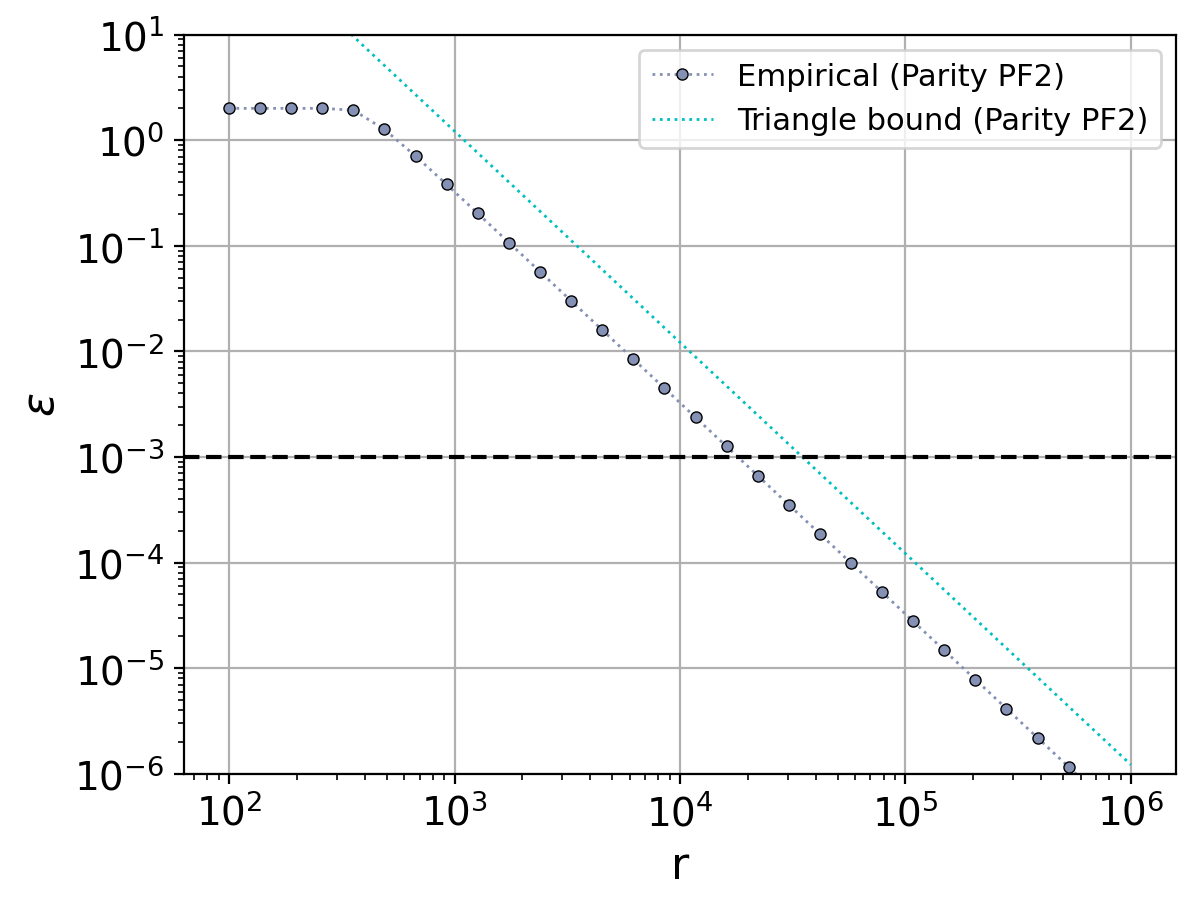

In [6]:
from scipy.sparse import csr_matrix

err_norm = 'spectral' # HS, spectral
n_qubit = 8; epsilon = 0.001
t = 2 * n_qubit 
heisenberg = heisenberg_1d(n=n_qubit, Jx=2.0, Jy=2.0, Jz=2.0, h=0.5, verbose=True)
heisenberg.partition(method='parity', verbose=True)
parity_group_sparse = [csr_matrix(heisenberg.even), csr_matrix(heisenberg.odd)]
parity_group = [heisenberg.even.to_matrix(), heisenberg.odd.to_matrix()]

r_list = np.logspace(2, 6, num=30, dtype=int)
# r_list = np.logspace(1, 6, num=30, dtype=int)
r_list_truncated = np.logspace(2, 6, num=30, dtype=int)

# interf_bound = np.array([interference_bound(parity_group, t, r) for r in r_list])
e_pf2_tight_parity = np.array([tight_bound(parity_group, 2, t, r) for r in r_list])
e_pf1_tight_parity = np.array([tight_bound(parity_group, 1, t, r) for r in r_list])

exact_U = expm(-1j * t * sum(parity_group))
# exact_U = expm(-1j * t * sum(parity_group))
pf1_parity_list = [op_error(unitary_matrix_product(parity_group_sparse, t=t/r)**r, exact_U, err_norm) for r in r_list]
pf2_parity_list = [op_error((unitary_matrix_product(parity_group_sparse, t=t/(2*r))@unitary_matrix_product(parity_group_sparse[::-1], t=t/(2*r)))**r, exact_U) for r in r_list]
# data_plot(r_list, pf1_parity_list, 'r.--', label= 'Empirical (Parity PF1)')
data_plot(r_list, pf2_parity_list, '.:', label= 'Empirical (Parity PF2)')

# data_plot(r_list, interf_bound[:, 0], 'r-', linewidth=1.4, label=r'Interference (L=2)')
# data_plot(r_list, e_pf1_tight_parity, 'r--', label=r'Tight bound (Parity PF1)', linewidth=1)
data_plot(r_list, e_pf2_tight_parity, 'c:', label=r'Triangle bound (Parity PF2)', linewidth=1)

plt.axhline(y=epsilon, c='k', linestyle='--', linewidth=1.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('r')
plt.ylim(1e-6, 1e1)
plt.ylabel(r'$\epsilon$')
# plt.title(rf'Nearest Neighbor Heisenberg, n={n_qubit}, t={t}')
plt.legend(fontsize=11, loc='upper right')
# plt.legend(fontsize=11, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig(f'./figs/bi_group_n={n_qubit}_t={t}.pdf', bbox_inches='tight')

---------Heisenberg Hamiltonian---------
inter_xx: ['XXIIIIII', 'IXXIIIII', 'IIXXIIII', 'IIIXXIII', 'IIIIXXII', 'IIIIIXXI', 'IIIIIIXX', 'XIIIIIIX']
inter_yy: ['YYIIIIII', 'IYYIIIII', 'IIYYIIII', 'IIIYYIII', 'IIIIYYII', 'IIIIIYYI', 'IIIIIIYY', 'YIIIIIIY']
inter_zz: ['ZZIIIIII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIZZII', 'IIIIIZZI', 'IIIIIIZZ', 'ZIIIIIIZ']
external ['ZIIIIIII', 'IZIIIIII', 'IIZIIIII', 'IIIZIIII', 'IIIIZIII', 'IIIIIZII', 'IIIIIIZI', 'IIIIIIIZ']
---------Partitioned Hamiltonian---------
inter_xx_even: ['XXIIIIII', 'IIXXIIII', 'IIIIXXII', 'IIIIIIXX']
inter_xx_odd: ['IXXIIIII', 'IIIXXIII', 'IIIIIXXI', 'XIIIIIIX']
external_even ['ZIIIIIII', 'IIZIIIII', 'IIIIZIII', 'IIIIIIZI']
external_odd ['IZIIIIII', 'IIIZIIII', 'IIIIIZII', 'IIIIIIIZ']


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


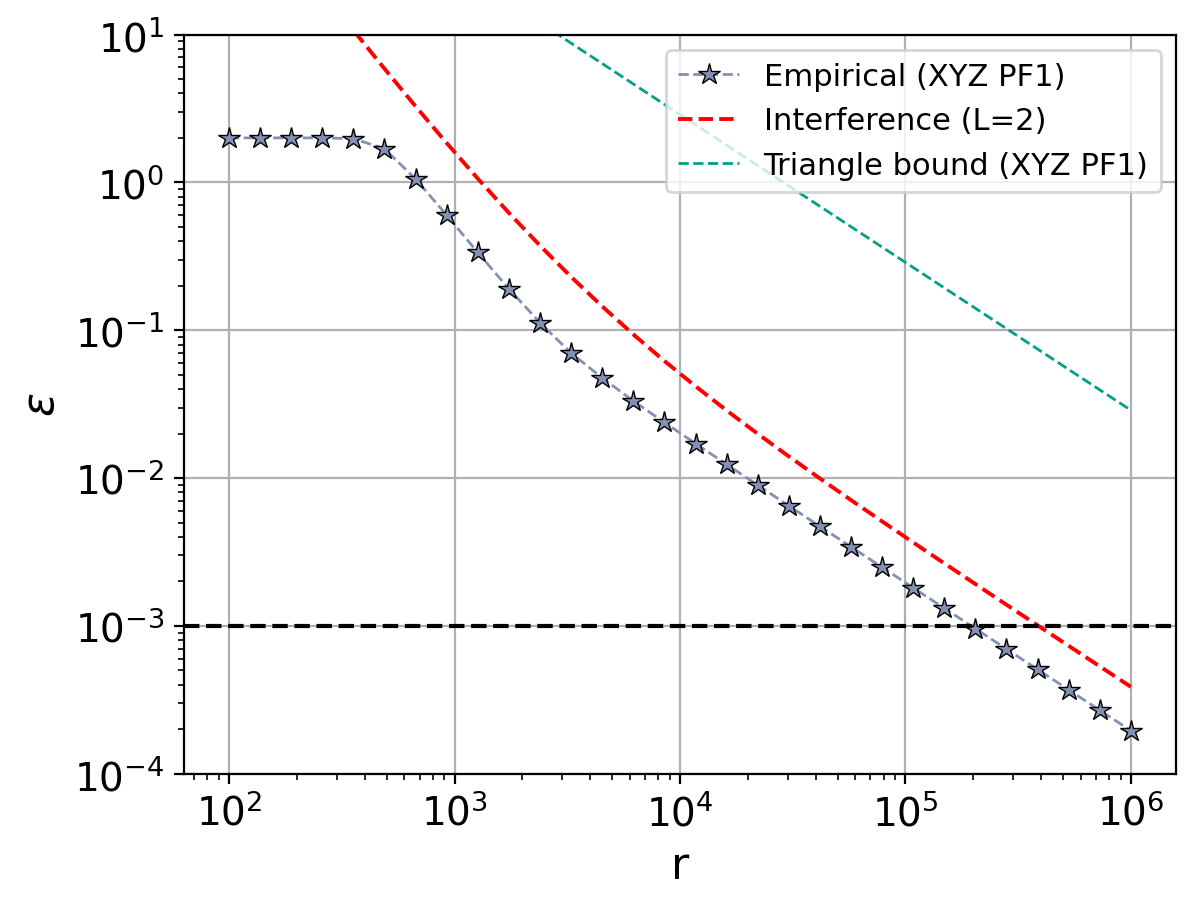

In [7]:
from scipy.sparse import csr_matrix

err_norm = 'spectral' # HS, spectral
n_qubit = 8; epsilon = 0.001
t = 2 * n_qubit 
heisenberg = heisenberg_1d(n=n_qubit, Jx=2.0, Jy=2.0, Jz=2.0, h=0.5, verbose=True)
heisenberg.partition(method='parity', verbose=True)
heisenberg.partition(method='tri', verbose=True)
parity_group_sparse = [csr_matrix(heisenberg.even), csr_matrix(heisenberg.odd)]
parity_group = [heisenberg.even.to_matrix(), heisenberg.odd.to_matrix()]
# parity_label = ['even-odd', 'odd-even']; parity_markers = ['*:', '.--']

tri_group_sparse = [csr_matrix(heisenberg.term0), csr_matrix(heisenberg.term1), csr_matrix(heisenberg.term2)]
tri_group = [heisenberg.term0.to_matrix(), heisenberg.term1.to_matrix(), heisenberg.term2.to_matrix()]

r_list = np.logspace(2, 6, num=30, dtype=int)
r_list_truncated = np.logspace(2, 6, num=30, dtype=int)

interf_bound = np.array([interference_bound(parity_group, t, r) for r in r_list])

xyz_group_sparse = [csr_matrix(heisenberg.xx), csr_matrix(heisenberg.yy), csr_matrix(heisenberg.zz) + csr_matrix(heisenberg.z)]
xyz_group = [heisenberg.xx.to_matrix() , heisenberg.yy.to_matrix(), heisenberg.zz.to_matrix() + heisenberg.z.to_matrix()]
# xyz_label = ['XYZ', 'YXZ', 'ZXY', 'ZYX', 'XZY', 'YZX'] 
e_pf1_tight_xyz = np.array([tight_bound(xyz_group, 1, t, r) for r in r_list])
# e_pf1_tight_parity = np.array([tight_bound(parity_group, 1, t, r) for r in r_list])
# e_pf1_tight_tri = np.array([tight_bound(tri_group, 1, t, r) for r in r_list])
# e_pf2_tight = np.array([tight_bound(xyz_group, 2, t, r) for r in r_list])

tri_bound = np.array([triangle_bound(xyz_group, 1, t, r) for r in r_list])

exact_U = expm(-1j * t * sum(xyz_group))
# exact_U = expm(-1j * t * sum(parity_group))
pf1_parity_list = [op_error(unitary_matrix_product(parity_group_sparse, t=t/r)**r, exact_U, err_norm) for r in r_list]
pf1_tri_list = [op_error(unitary_matrix_product(tri_group_sparse, t=t/r)**r, exact_U, err_norm) for r in r_list]
# pf2_parity_list = [op_error(matrix_power(pf(parity_group, 2, t=t/r), r), exact_U) for r in r_list]
# data_plot(r_list, pf1_tri_list, '.--', label= 'Empirical (Tri PF1)')
# data_plot(r_list, pf1_parity_list, '.--', label= 'Empirical (Parity PF1)')
# data_plot(r_list, pf2_parity_list, '.:', label= 'Empirical (Parity PF2)')

pf1_xyz_list = [op_error(unitary_matrix_product(xyz_group_sparse, t=t/r)**r, exact_U, err_norm) for r in r_list]
# pf2_xyz_list = [op_error(matrix_power(pf(xyz_group, 2, t=t/r), r), exact_U) for r in r_list]
data_plot(r_list, pf1_xyz_list, '*--', label= 'Empirical (XYZ PF1)')
# data_plot(r_list, pf2_xyz_list, '*:', label= 'Empirical (XYZ PF2)')

data_plot(r_list, interf_bound[:, 0], 'r--', linewidth=1.4, label=r'Interference (L=2)')
# data_plot(r_list, e_pf1_tight_tri, '-', label=r'tight bound (Tri PF1)', linewidth=1)
# data_plot(r_list, e_pf1_tight_parity, '-', label=r'tight bound (Parity PF1)', linewidth=1)
data_plot(r_list, e_pf1_tight_xyz, '--', label=r'Triangle bound (XYZ PF1)', linewidth=1)
# data_plot(r_list, e_pf2_tight, '-', label=r'tight bound (XYZ PF2)', linewidth=1)
# data_plot(r_list, tri_bound, 'p--', label=r'triangle?loose  (XYZ PF1)', linewidth=1, alpha=0.6)
# data_plot(r_list_truncated, ana_bound_xyz_pf1, 'p--', label=r'analytic bound (XYZ PF1)', alpha=0.6)
# data_plot(r_list_truncated, ana_bound_xyz_pf2, 'p:', label=r'analytic bound (XYZ PF2)', alpha=0.6)
# data_plot(r_list_truncated, ana_bound_parity_pf1, '^--', label=r'analytic bound (parity PF1)', alpha=0.6)
# data_plot(r_list_truncated, ana_bound_parity_pf2, '^:', label=r'analytic bound (parity PF2)', alpha=0.6)

# data_plot(r_list, interf_bound[:, 1], 'y--', alpha=0.7, label=r'$\min(||H_0||,||H_1||)\, t/r$')
# data_plot(r_list, interf_bound[:, 2], '--', alpha=0.7, label=r'$\frac{1}{2}||[H_0,H_1]||\, t^2/r$') 
# data_plot(r_list, interf_bound[:, 3], 'g--', alpha=0.7, label=r'$C_3\frac{t^3}{r^2}$', linewidth=1)
plt.axhline(y=epsilon, c='k', linestyle='--', linewidth=1.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('r')
plt.ylabel(r'$\epsilon$')
plt.ylim(1e-4, 1e1)
# plt.title(rf'(Nearest Neighbor Heisenberg, n={n_qubit}, t={t}, norm={err_norm})')
plt.legend(fontsize=11, loc='upper right')
# plt.legend(fontsize=11, bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig(f'./figs/tri_group_n={n_qubit}_t={t}_xyz.pdf', bbox_inches='tight')

In [6]:
n_qubit = 8; epsilon = 0.001
t = 2 * n_qubit 
heisenberg = heisenberg_1d(n=n_qubit, Jx=2.0, Jy=2.0, Jz=2.0, h=0.5, verbose=True)
heisenberg.partition(method='parity', verbose=True)
parity_group = [heisenberg.even.to_matrix(), heisenberg.odd.to_matrix()]
# parity_label = ['even-odd', 'odd-even']; parity_markers = ['*:', '.--']

r_list = np.logspace(1, 6, num=30, dtype=int)
r_list_truncated = np.logspace(2, 6, num=30, dtype=int)

interf_bound = np.array([interference_bound(parity_group, t, r) for r in r_list])

xyz_group = [heisenberg.xx , heisenberg.yy, heisenberg.zz + heisenberg.z]
# xyz_label = ['XYZ', 'YXZ', 'ZXY', 'ZYX', 'XZY', 'YZX'] 
e_pf1_tight = np.array([tight_bound(xyz_group, 1, t, r) for r in r_list])
e_pf2_tight = np.array([tight_bound(xyz_group, 2, t, r) for r in r_list])

tri_bound = np.array([triangle_bound(xyz_group, 1, t, r) for r in r_list])

# ana_bound_xyz_pf1 = np.array([analytic_bound(xyz_group, 1/2, t, r) for r in r_list_truncated])
# ana_bound_xyz_pf2 = np.array([analytic_bound(xyz_group, 2/2, t, r) for r in r_list_truncated])

# ana_bound_parity_pf1 = np.array([analytic_bound(parity_group, 1/2, t, r) for r in r_list_truncated])
# ana_bound_parity_pf2 = np.array([analytic_bound(parity_group, 2/2, t, r) for r in r_list_truncated])

exact_U = expm(-1j * t * sum(parity_group))
pf1_parity_list = [op_error(matrix_power(unitary_matrix_product(parity_group, t=t/r), r), exact_U) for r in r_list]
# pf2_parity_list = [op_error(matrix_power(pf(parity_group, 2, t=t/r), r), exact_U) for r in r_list]
data_plot(r_list, pf1_parity_list, '.--', label= 'Empirical even/odd PF1')
# data_plot(r_list, pf2_parity_list, '.:', label= 'Empirical even/odd PF2')

pf1_xyz_list = [op_error(matrix_power(unitary_matrix_product(xyz_group, t=t/r), r), exact_U) for r in r_list]
# pf2_xyz_list = [op_error(matrix_power(pf(xyz_group, 2, t=t/r), r), exact_U) for r in r_list]
data_plot(r_list, pf1_xyz_list, '*--', label= 'Empirical (XYZ PF1)')
# data_plot(r_list, pf2_xyz_list, '*:', label= 'Empirical (XYZ PF2)')

data_plot(r_list, interf_bound[:, 0], 'r-', linewidth=1.4, label=r'Interference (L=2)')
data_plot(r_list, e_pf1_tight, '-', label=r'tight bound (XYZ PF1)', linewidth=1)
data_plot(r_list, e_pf2_tight, '-', label=r'tight bound (XYZ PF2)', linewidth=1)
data_plot(r_list, tri_bound, 'p--', label=r'triangle?loose  (XYZ PF1)', linewidth=1, alpha=0.6)
# data_plot(r_list_truncated, ana_bound_xyz_pf1, 'p--', label=r'analytic bound (XYZ PF1)', alpha=0.6)
# data_plot(r_list_truncated, ana_bound_xyz_pf2, 'p:', label=r'analytic bound (XYZ PF2)', alpha=0.6)
# data_plot(r_list_truncated, ana_bound_parity_pf1, '^--', label=r'analytic bound (parity PF1)', alpha=0.6)
# data_plot(r_list_truncated, ana_bound_parity_pf2, '^:', label=r'analytic bound (parity PF2)', alpha=0.6)

data_plot(r_list, interf_bound[:, 1], 'y--', alpha=0.7, label=r'$\min(||H_0||,||H_1||)\, t/r$')
data_plot(r_list, interf_bound[:, 2], '--', alpha=0.7, label=r'$\frac{1}{2}||[H_0,H_1]||\, t^2/r$') 
data_plot(r_list, interf_bound[:, 3], 'g--', alpha=0.7, label=r'$C_3\frac{t^3}{r^2}$', linewidth=1)
plt.axhline(y=epsilon, c='k', linestyle='--', linewidth=1.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('r')
plt.ylabel(r'$\epsilon$')
plt.title(rf'(Nearest Neighbor Heisenberg, n={n_qubit}, t={t})')
plt.legend(fontsize=11, bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig(f'./figs/bound_1from2_n={n_qubit}_t={t}.pdf', bbox_inches='tight')

---------Heisenberg Hamiltonian---------
inter_xx: ['XXIIIIII', 'IXXIIIII', 'IIXXIIII', 'IIIXXIII', 'IIIIXXII', 'IIIIIXXI', 'IIIIIIXX', 'XIIIIIIX']
inter_yy: ['YYIIIIII', 'IYYIIIII', 'IIYYIIII', 'IIIYYIII', 'IIIIYYII', 'IIIIIYYI', 'IIIIIIYY', 'YIIIIIIY']
inter_zz: ['ZZIIIIII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIZZII', 'IIIIIZZI', 'IIIIIIZZ', 'ZIIIIIIZ']
external ['ZIIIIIII', 'IZIIIIII', 'IIZIIIII', 'IIIZIIII', 'IIIIZIII', 'IIIIIZII', 'IIIIIIZI', 'IIIIIIIZ']
---------Partitioned Hamiltonian---------
inter_xx_even: ['XXIIIIII', 'IIXXIIII', 'IIIIXXII', 'IIIIIIXX']
inter_xx_odd: ['IXXIIIII', 'IIIXXIII', 'IIIIIXXI', 'XIIIIIIX']
external_even ['ZIIIIIII', 'IIZIIIII', 'IIIIZIII', 'IIIIIIZI']
external_odd ['IZIIIIII', 'IIIZIIII', 'IIIIIZII', 'IIIIIIIZ']


AttributeError: 'Operator' object has no attribute 'shape'

In [95]:
n_qubit = 8
# t = n_qubit; epsilon = 0.001
r = 10000
heisenberg = heisenberg_1d(n=n_qubit, Jx=2.0, Jy=2.0, Jz=2.0, h=0.5, verbose=True)
heisenberg.partition(method='parity', verbose=True)
parity_group = [heisenberg.even.to_matrix(), heisenberg.odd.to_matrix()]
xyz_group = [heisenberg.xx , heisenberg.yy, heisenberg.zz + heisenberg.z]

def herm2unitary(H_list, dt):
    return [expm(-1j * dt * H) for H in H_list]

def exact_U(t):
    return expm(-1j * t * sum(parity_group))

# def matrix_product(list_U, tdt=1):
#     vmapped_multi_dot = jax.vmap(jnp.linalg.multi_dot)
#     product = vmapped_multi_dot([matrix_power(U, tdt) for U in list_U])
#     return product

# dt = 0.001
# parity_group_U = herm2unitary(parity_group, dt)
# xyz_group_U = herm2unitary(xyz_group, dt)

vmapped_multi_dot = jax.vmap(jnp.linalg.multi_dot)

t_list = list(set(np.logspace(-1, 3, num=20, dtype=int)))
t_list.sort()
print('t_list: \n', t_list)

interf_bound = np.array([interference_bound(parity_group, t, r) for t in t_list])

e_xyz_pf1_tight = np.array([tight_bound(xyz_group, 1, t, r) for t in t_list])
e_par_pf1_tight = np.array([tight_bound(parity_group, 1, t, r) for t in t_list])
pf1_parity_list = [op_error(matrix_power(np.linalg.multi_dot(herm2unitary(parity_group, t/r)), r), exact_U(t)) for t in t_list]
data_plot(t_list, pf1_parity_list, '.--', label= 'Empirical (Parity PF1)')

pf1_xyz_list = [op_error(matrix_power(np.linalg.multi_dot(herm2unitary(xyz_group, t/r)), r), exact_U(t)) for t in t_list]
data_plot(t_list, pf1_xyz_list, '*--', label= 'Empirical (XYZ PF1)')
data_plot(t_list, e_xyz_pf1_tight, ':', label=r'Tight bound (XYZ PF1)', linewidth=1)
data_plot(t_list, e_par_pf1_tight, ':', label=r'Tight bound (PAR PF1)', linewidth=1)

# data_plot(t_list, interf_bound[:, 0], 'r-', linewidth=1.4, label=r'Interference bound (L=2)')
data_plot(t_list, interf_bound[:, 1], 'y--', alpha=0.7, label=r'$\min(||H_0||,||H_1||)\, t/r$')
data_plot(t_list, interf_bound[:, 2], '--', alpha=0.7, label=r'$\frac{1}{2}||[H_0,H_1]||\, t^2/r$') 
data_plot(t_list, interf_bound[:, 3], 'g--', alpha=0.7, label=r'$C_3\frac{t^3}{r^2}$', linewidth=1)
# plt.axhline(y=epsilon, c='k', linestyle='--', linewidth=1.5)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel('t')
plt.ylabel(r'$\epsilon$')
plt.title(rf'(Nearest Neighbor Heisenberg, n={n_qubit}, r={r})')
plt.legend(fontsize=11, bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig(f'./figs/NN_Heisenberg_n={n_qubit}_r={r}.pdf', bbox_inches='tight')

NameError: name 'heisenberg_1d' is not defined